## Identify faulty images and resolve the errors. If not, return their filenames

In [1]:
import os
from PIL import Image
folder_path = 'PetImagesTest'    # PetImages
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

** Path: PetImagesTest\Dog\111.jpg  **

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## data generator

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.4,      # data augmentation
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    fill_mode='nearest'
)

# with flow from directory, data is not loaded into RAM.
train = train_datagen.flow_from_directory('PetImages/', class_mode='binary', batch_size=32, target_size=(200, 200))

Found 202 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale, no augmentation
test = test_datagen.flow_from_directory('PetImagesTest/', class_mode='binary', batch_size=32, target_size=(200, 200))

Found 22 images belonging to 2 classes.


## modeling

In [7]:
model = Sequential([
    Input(shape=(200, 200, 3)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       8,000,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,005,289 (30.54 MB)

 Trainable params: 8,005,289 (30.54 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train, steps_per_epoch=len(train), validation_data=test, validation_steps=len(test), epochs=2)

C:\Users\javad\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5045 - loss: 2.0759 - val_accuracy: 0.5455 - val_loss: 0.6744
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5322 - loss: 0.7165 - val_accuracy: 0.5000 - val_loss: 0.8448


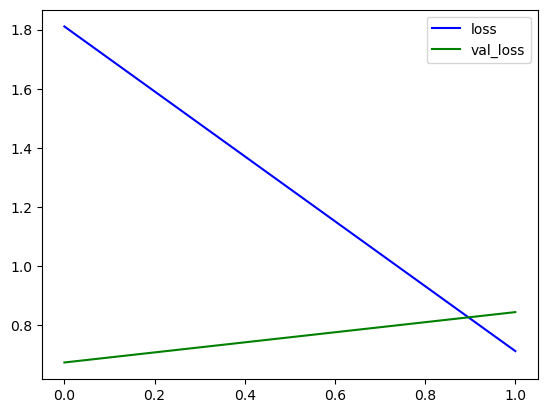

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss', color='blue')
plt.plot(history.history['val_loss'], label='val_loss', color='green')
plt.legend()

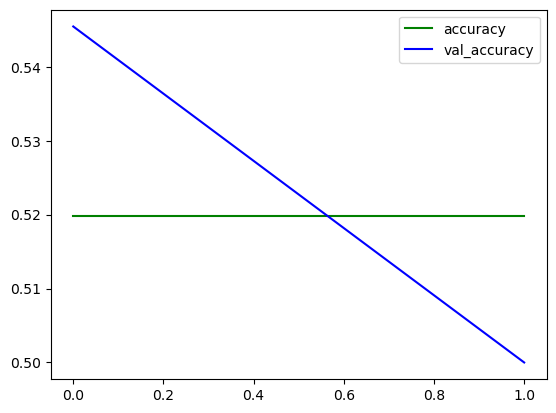

In [21]:
plt.plot(history.history['accuracy'], label='accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
plt.legend()

In [19]:
# model.save('catvsdog.keras')